# Train on real data - Transfer Learning

In [1]:
STUDY_NAME = 'Subsea_Study[4-7]'

In [4]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

from utils import *
from models import *
from classes import *
import config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
ROOT = config.ROOT
ROOT_SLASH = config.ROOT_SLASH
DATA_PATH = config.DATA_PATH

STUDY_PATH = f'{DATA_PATH}/{STUDY_NAME}'
GEN_DFS_PATH = f'{STUDY_PATH}/gens'
TPL_PATH = f'{ROOT_SLASH}\\olga_proj\\{STUDY_NAME}'

REAL_FILE = config.REAL_FILE
REAL_FILE_ALL = config.REAL_FILE_ALL

TRAIN_VAL_RATIO_REAL = config.TRAIN_VAL_RATIO_REAL
TRAIN_VAL_RATIO_GEN = config.TRAIN_VAL_RATIO_GEN
N_STEPS = config.N_STEPS
N_FEATURES_IN = config.N_FEATURES_IN
N_FEATURES_OUT = config.N_FEATURES_OUT

pd.options.display.max_columns = 25

STUDY_PATH, GEN_DFS_PATH, REAL_FILE, TPL_PATH, TRAIN_VAL_RATIO_REAL, TRAIN_VAL_RATIO_GEN

('C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[4-7]',
 'C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[4-7]/gens',
 'C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/real.csv',
 'C:\\Users\\Asus\\Desktop\\Skoltech\\Multiphase flows\\olga_proj\\Subsea_Study[4-7]',
 0.3333333333333333,
 0.8)

## 2. Train real transfer

### AdaBoost

is a network: False
Model name:       AB-4-transf
Training time:    1.692 sec
Train error:      6.258
Test error (avg): 8.664
           (oil): 6.509
           (gas): 6.978
           (wat): 12.505



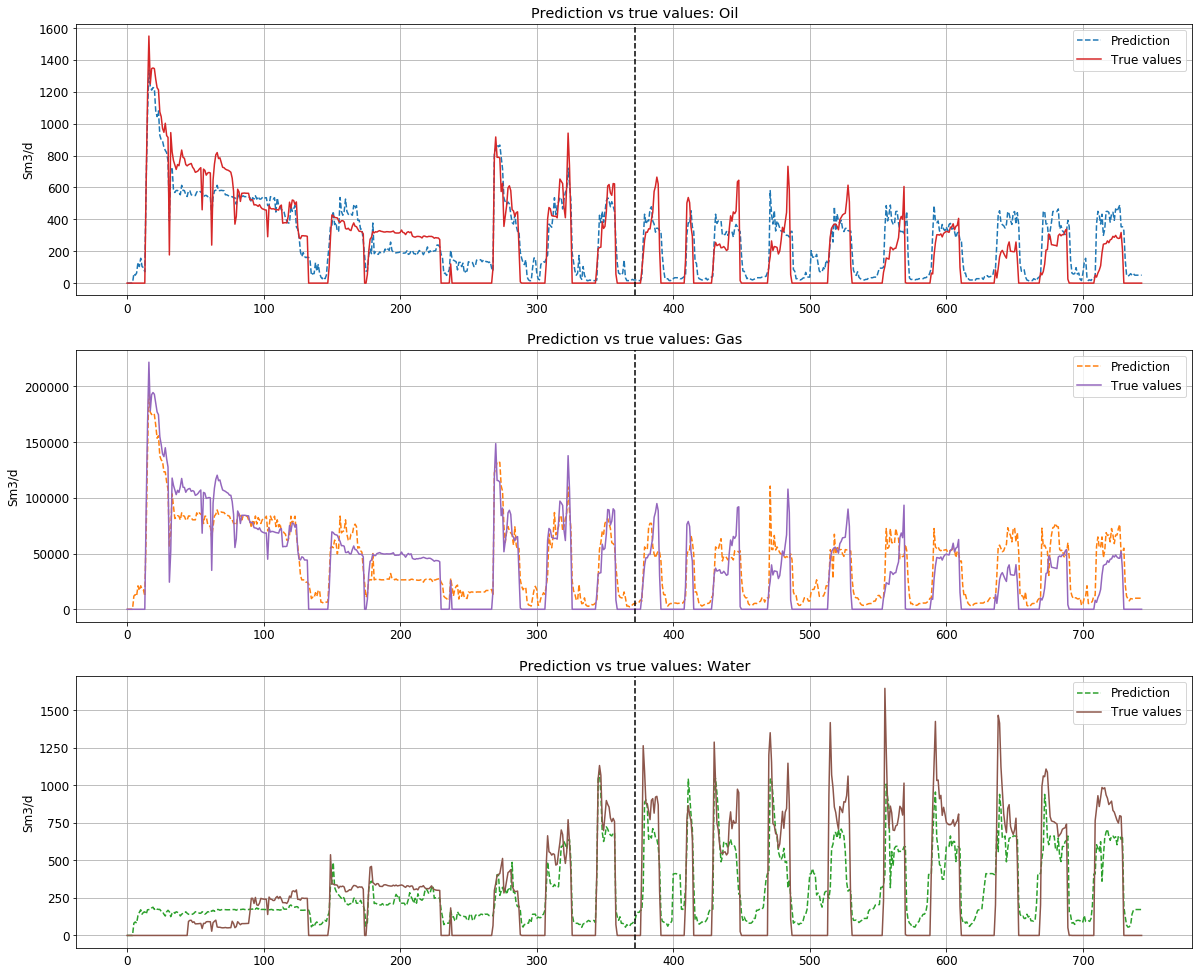

In [7]:
m = TL(model_name='AB-4', 
       study_path=STUDY_PATH,
       real_file=REAL_FILE_ALL,
       train_all_ratio=1/2)

m.train(tuning=True, verbose=False)
err, t = m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
# m.save()

In [3]:
n_experiments = 50
errs, times = [], []

for i in tqdm_notebook(range(n_experiments)):
    m = TL(model_name='AB-4', 
       study_path=STUDY_PATH, 
       real_file=REAL_FILE_ALL, 
       train_all_ratio=1/2)

    m.train(tuning=True, verbose=False)
    err, t = m.predict(plot_losses=False, plot_preds=False, plot_errs=False, print_res=False)
    errs.append(err)
    times.append(time)
    
print (f'Error: %.2f+-%.2f' % (np.mean(errs), np.std(errs)))
# print (f'Time:  %.3f sec' % (times[0]))


Error: 8.58+-0.23


### LGB

is a network: False
Model name:       LGB-4-transf
Training time:    0.305 sec
Train error:      2.917
Test error (avg): 7.511
           (oil): 5.939
           (gas): 5.895
           (wat): 10.700



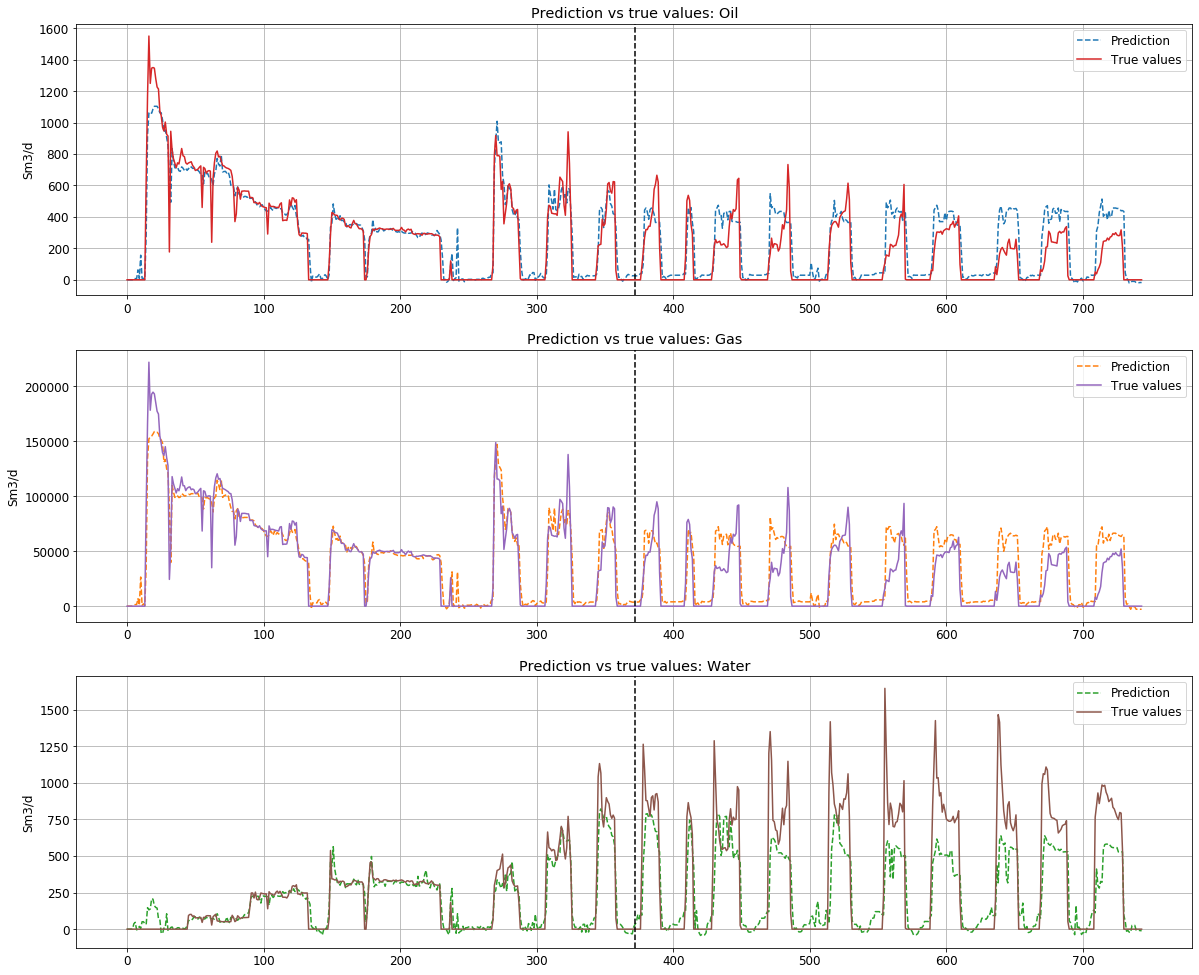

In [11]:
m = TL(model_name='LGB-4', 
       study_path=STUDY_PATH, 
       real_file=REAL_FILE_ALL, 
       train_all_ratio=1/2)

m.train(tuning=True, verbose=False)
err, t = m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
# m.save()

In [7]:
n_experiments = 50
errs, times = [], []

for i in tqdm_notebook(range(n_experiments)):
    m = TL(model_name='LGB-4', 
       study_path=STUDY_PATH, 
       real_file=REAL_FILE_ALL, 
       train_all_ratio=1/2)

    m.train(tuning=True, verbose=False)
    err, t = m.predict(plot_losses=False, plot_preds=False, plot_errs=False, print_res=False)
    errs.append(err)
    times.append(time)
    
print (f'Error: %.2f+-%.2f' % (np.mean(errs), np.std(errs)))
# print (f'Time:  %.3f sec' % (times[0]))


Error: 7.51+-0.00


### XGB

is a network: False


C:\Users\Asus\Anaconda3\lib\site-packages\xgboost\data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


Model name:       XGB-4-transf
Training time:    0.265 sec
Train error:      3.127
Test error (avg): 8.585
           (oil): 6.800
           (gas): 6.563
           (wat): 12.393



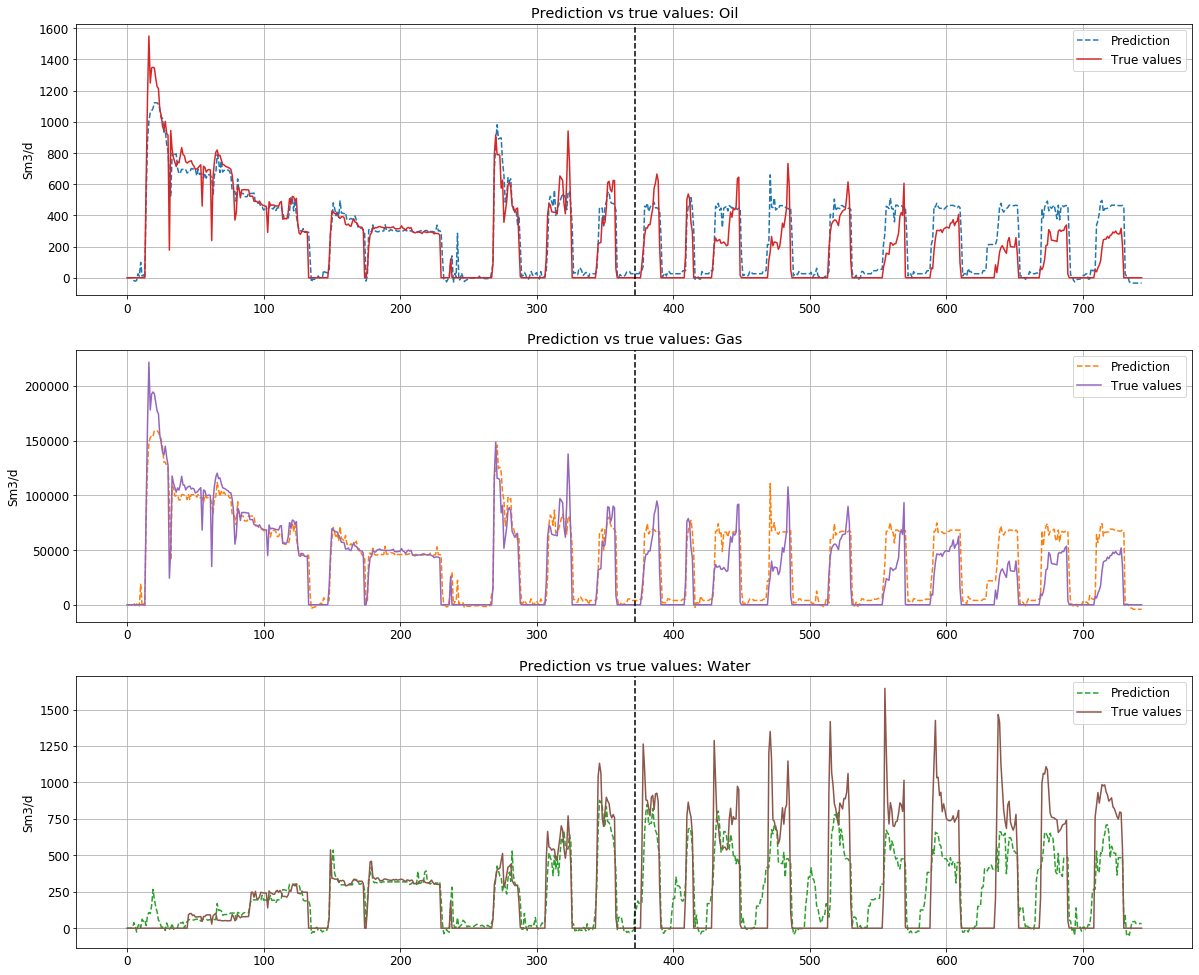

In [15]:
m = TL(model_name='XGB-4', 
       study_path=STUDY_PATH, 
       real_file=REAL_FILE_ALL, 
       train_all_ratio=1/2)

m.train(tuning=True, verbose=False)
err, t = m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
# m.save()

In [11]:
n_experiments = 50
errs, times = [], []

for i in tqdm_notebook(range(n_experiments)):
    m = TL(model_name='XGB-4', 
       study_path=STUDY_PATH, 
       real_file=REAL_FILE_ALL, 
       train_all_ratio=1/2)

    m.train(tuning=True, verbose=False)
    err, t = m.predict(plot_losses=False, plot_preds=False, plot_errs=False, print_res=False)
    errs.append(err)
    times.append(time)
    
print (f'Error: %.2f+-%.2f' % (np.mean(errs), np.std(errs)))
# print (f'Time:  %.3f sec' % (times[0]))

C:\Users\Asus\Anaconda3\lib\site-packages\xgboost\data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\Asus\Anaconda3\lib\site-packages\xgboost\data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\Asus\Anaconda3\lib\site-packages\xgboost\data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\Asus\Anaconda3\lib\site-packages\xgboost\data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it 

C:\Users\Asus\Anaconda3\lib\site-packages\xgboost\data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\Asus\Anaconda3\lib\site-packages\xgboost\data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\Asus\Anaconda3\lib\site-packages\xgboost\data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\Asus\Anaconda3\lib\site-packages\xgboost\data.py:96: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it 


Error: 8.59+-0.00


### RF

is a network: False
Model name:       RF-4-transf
Training time:    3.959 sec
Train error:      1.403
Test error (avg): 7.494
           (oil): 6.542
           (gas): 6.420
           (wat): 9.520



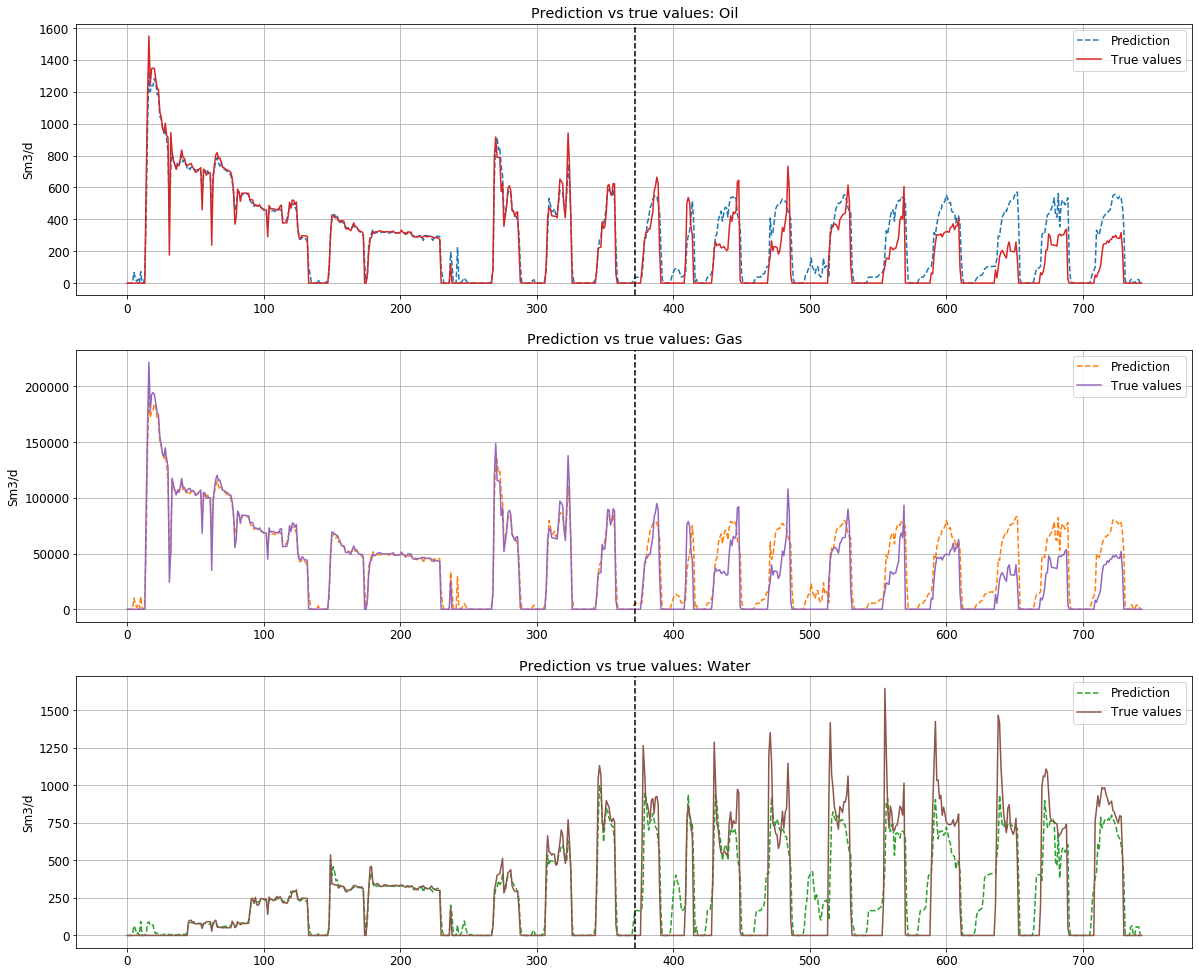

In [19]:
m = TL(model_name='RF-4', 
       study_path=STUDY_PATH, 
       real_file=REAL_FILE_ALL, 
       train_all_ratio=1/2)

m.train(tuning=True, verbose=False)
err, t = m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
# m.save()

In [15]:
n_experiments = 50
errs, times = [], []

for i in tqdm_notebook(range(n_experiments)):
    m = TL(model_name='RF-4', 
       study_path=STUDY_PATH, 
       real_file=REAL_FILE_ALL, 
       train_all_ratio=1/2)

    m.train(tuning=True, verbose=False)
    err, t = m.predict(plot_losses=False, plot_preds=False, plot_errs=False, print_res=False)
    errs.append(err)
    times.append(time)
    
print (f'Error: %.2f+-%.2f' % (np.mean(errs), np.std(errs)))
# print (f'Time:  %.3f sec' % (times[0]))


Error: 7.53+-0.07


### MLP

#### Transfer

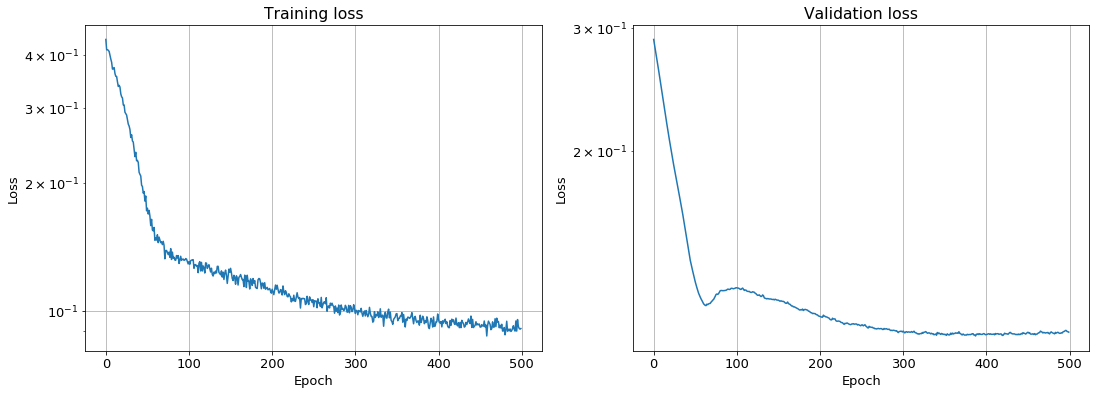

Model name:       MLP-4-transf
Training time:    15.398 sec
Train error:      7.547
Val error:        8.605
Test error (avg): 11.141
           (oil): 8.095
           (gas): 8.256
           (wat): 17.073



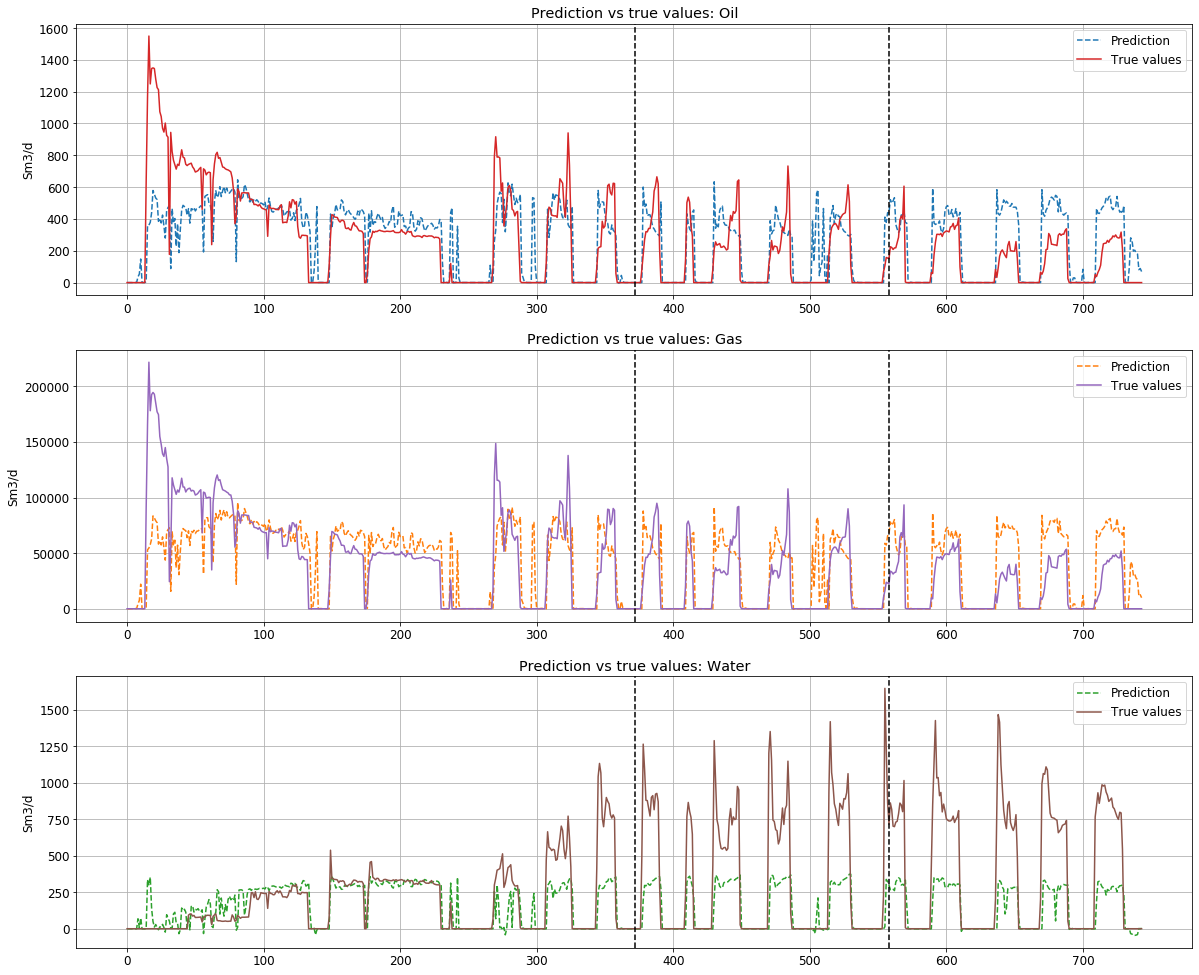

In [9]:
m = TL(model_name='MLP-4', 
       study_path=STUDY_PATH, 
       real_file=REAL_FILE_ALL, 
       train_all_ratio=1/2, 
       loss='mae', 
       lr=1e-4)

m.train(n_epochs=500, tuning=False, verbose=False)
err, t = m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
# m.save()

#### Tuning

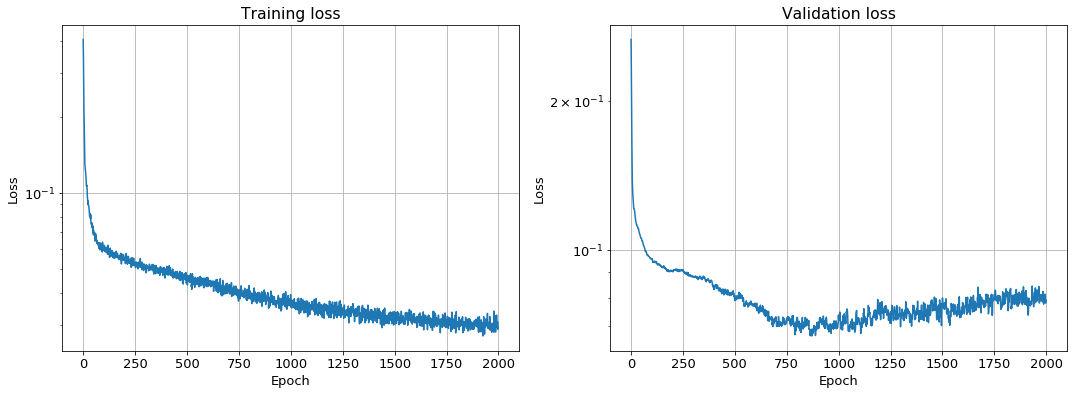

Model name:       MLP-4-transf
Training time:    86.169 sec
Train error:      2.128
Val error:        6.166
Test error (avg): 5.944
           (oil): 3.922
           (gas): 4.107
           (wat): 9.804



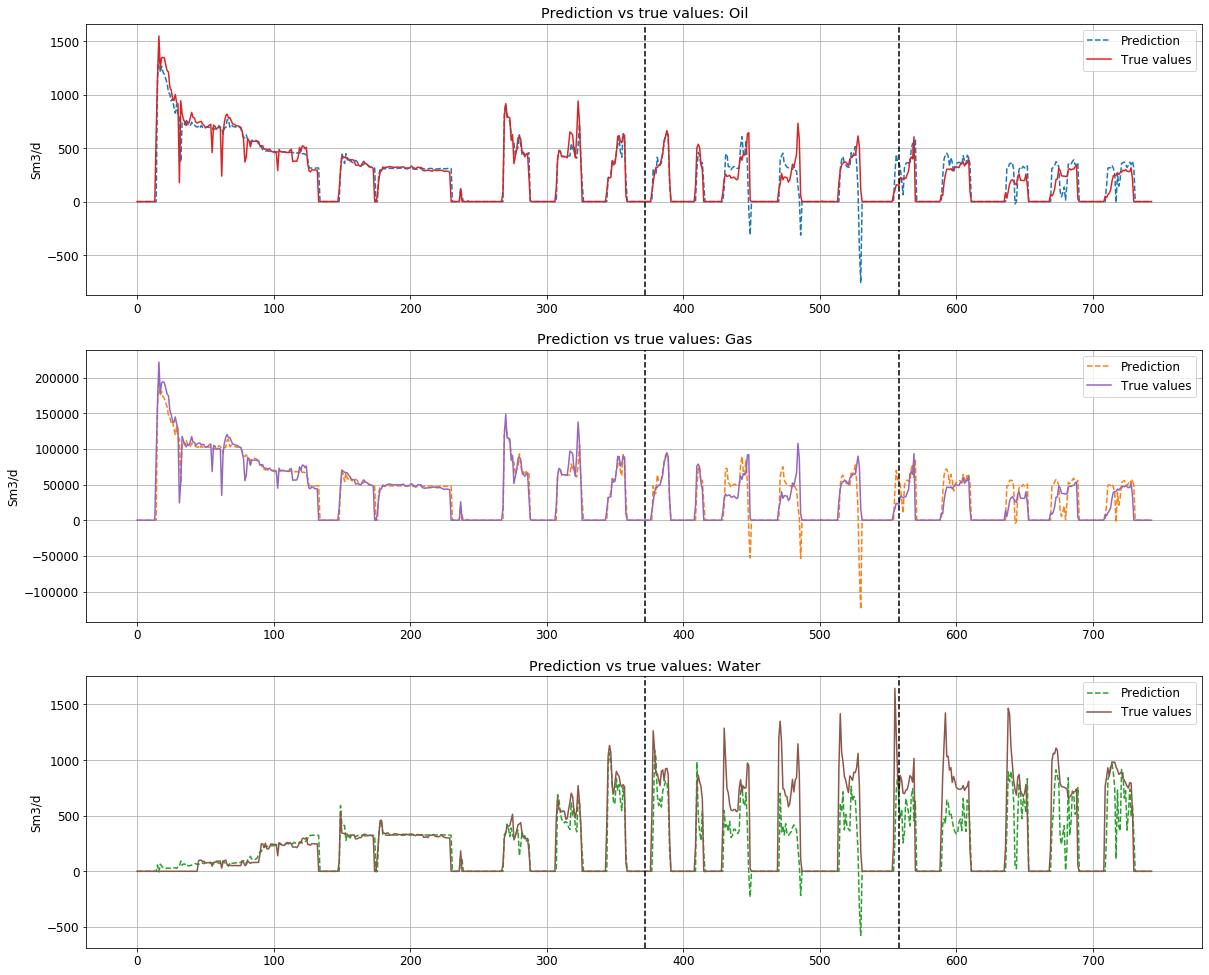

In [10]:
m = TL(model_name='MLP-4', 
       study_path=STUDY_PATH, 
       real_file=REAL_FILE_ALL, 
       train_all_ratio=1/2, 
       loss='mae', 
       lr=1e-4)

m.train(n_epochs=2000, tuning=True, verbose=False)
err, t = m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
# m.save()

#### Transfer -> Tuning

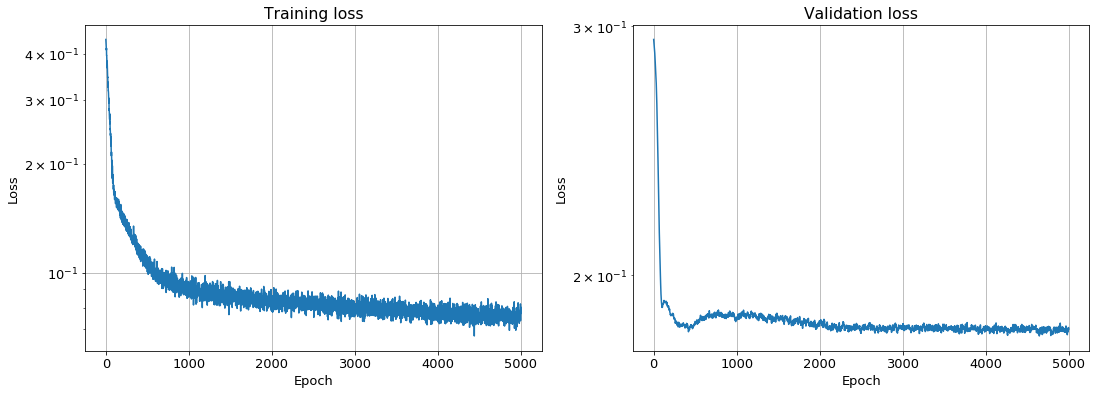

Model name:       MLP-4-transf
Training time:    112.752 sec
Train error:      4.788
Val error:        9.183
Test error (avg): 12.241
           (oil): 9.895
           (gas): 9.872
           (wat): 16.954



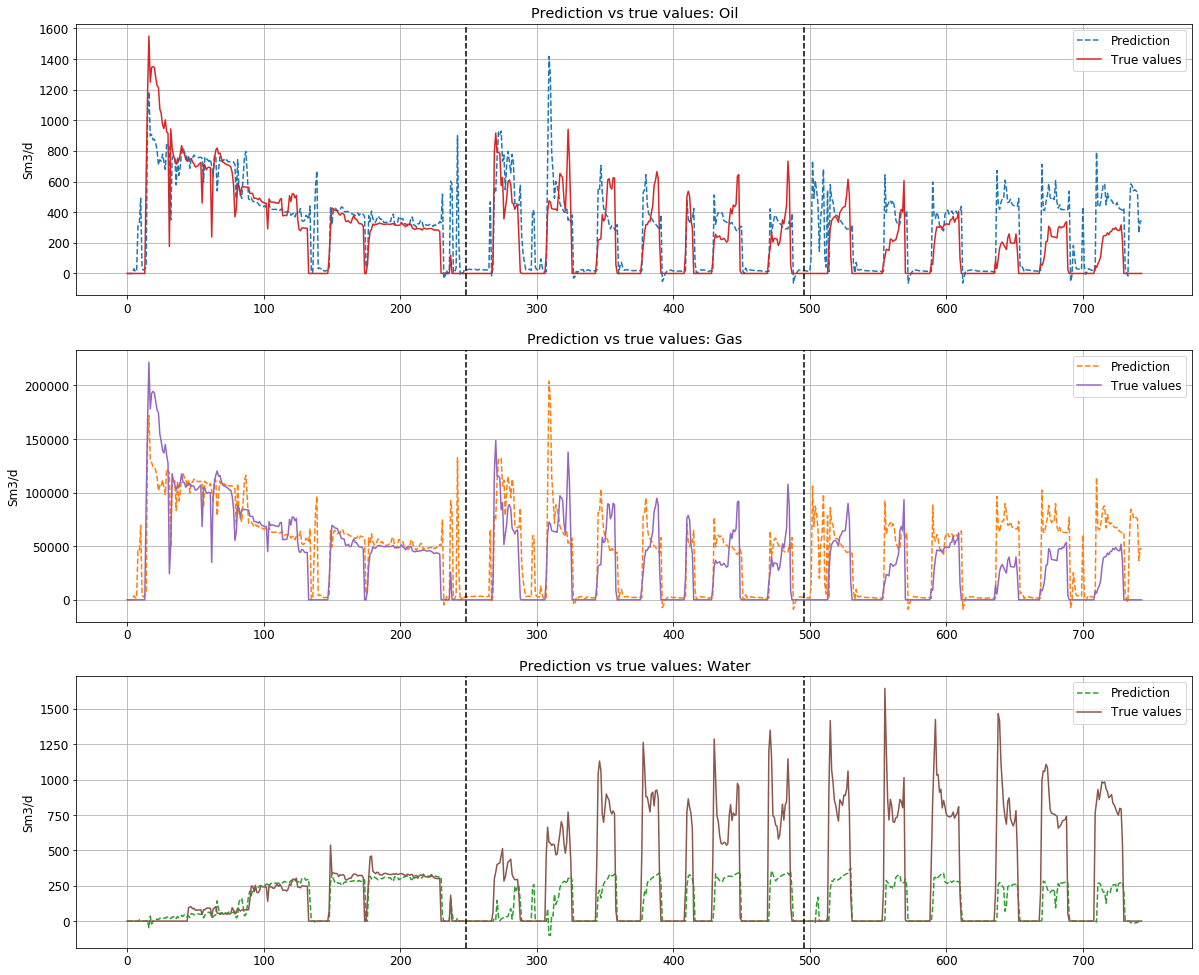

In [11]:
m = TL(model_name='MLP-4', 
       study_path=STUDY_PATH, 
       real_file=REAL_FILE_ALL, 
       train_all_ratio=TRAIN_VAL_RATIO_REAL, 
       loss='mae', 
       lr=1e-4)

m.train(n_epochs=5000, tuning=False, verbose=False)
err, t = m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
# m.save()

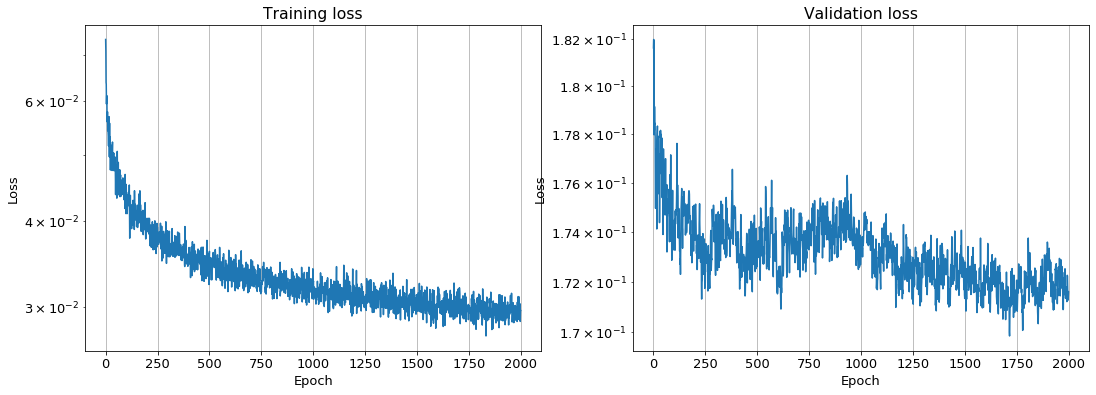

Model name:       MLP-4-transf
Training time:    72.739 sec
Train error:      1.804
Val error:        8.219
Test error (avg): 7.534
           (oil): 3.283
           (gas): 3.210
           (wat): 16.110



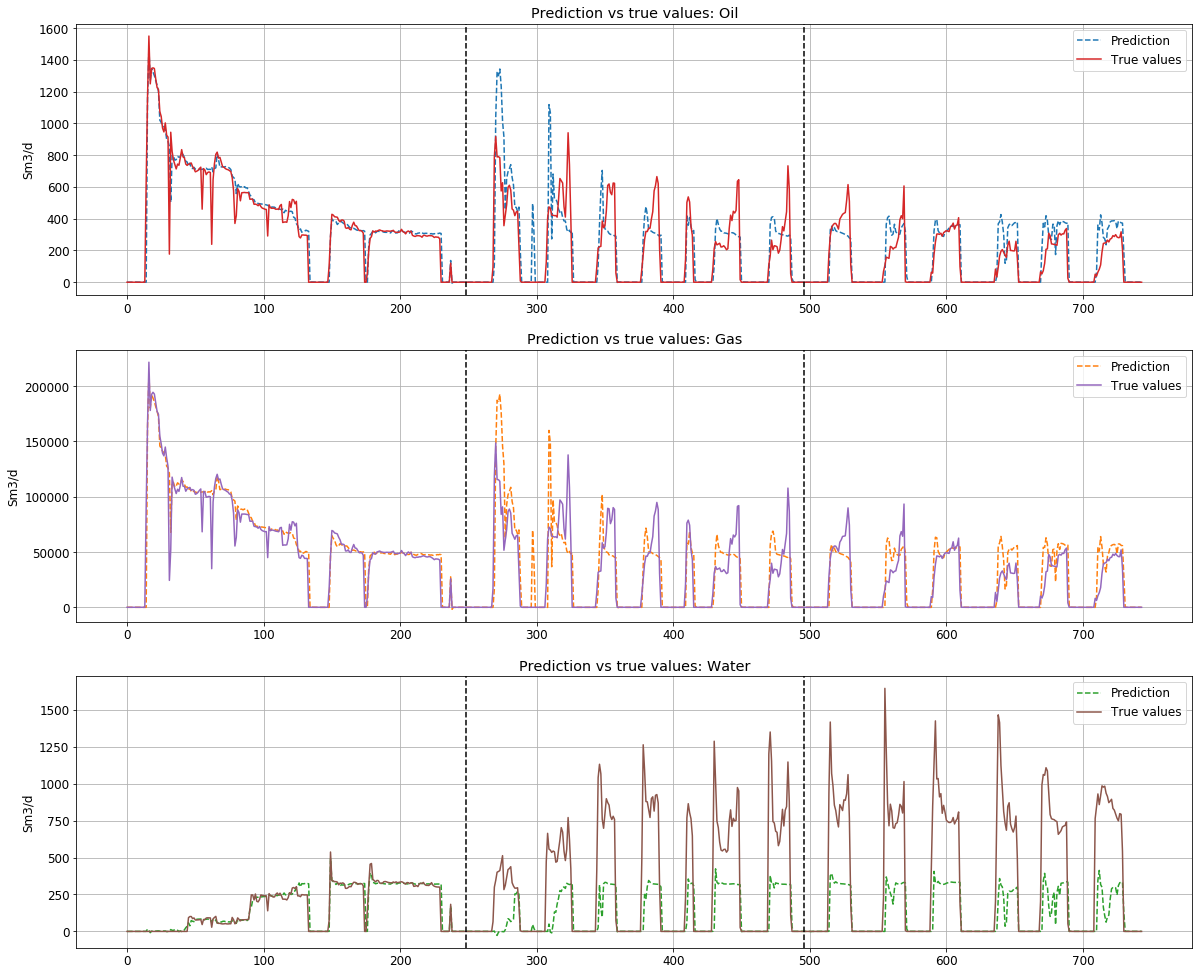

In [12]:
m.train(n_epochs=2000, tuning=True, verbose=False)
err, t = m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
# m.save()

### TCN

#### Transfer

360 180
367 181


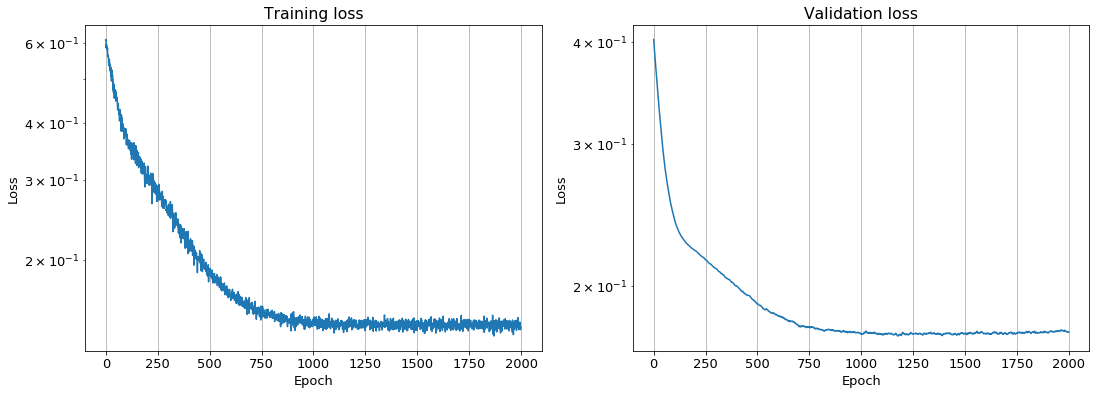

Model name:       TCN-4-transf
Training time:    76.076 sec
Train error:      12.530
Val error:        14.323
Test error (avg): 13.525
           (oil): 8.573
           (gas): 9.358
           (wat): 22.646



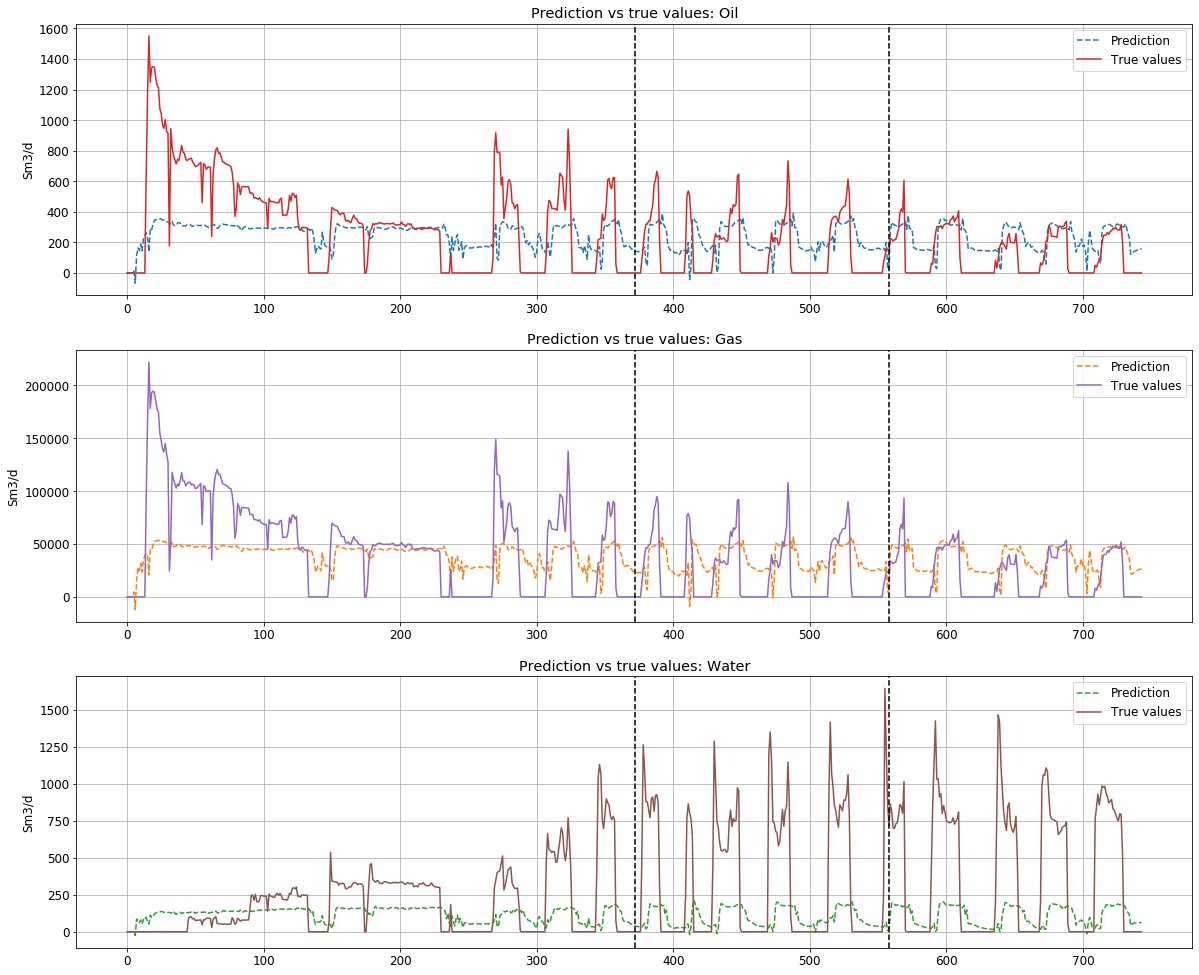

In [15]:
m = TL(model_name='TCN-4', 
       study_path=STUDY_PATH, 
       real_file=REAL_FILE_ALL, 
       train_all_ratio=1/2, 
       loss='mae', 
       lr=1e-4)

m.train(n_epochs=2000, tuning=False, verbose=False)
err, t = m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
# m.save()

#### Tuning

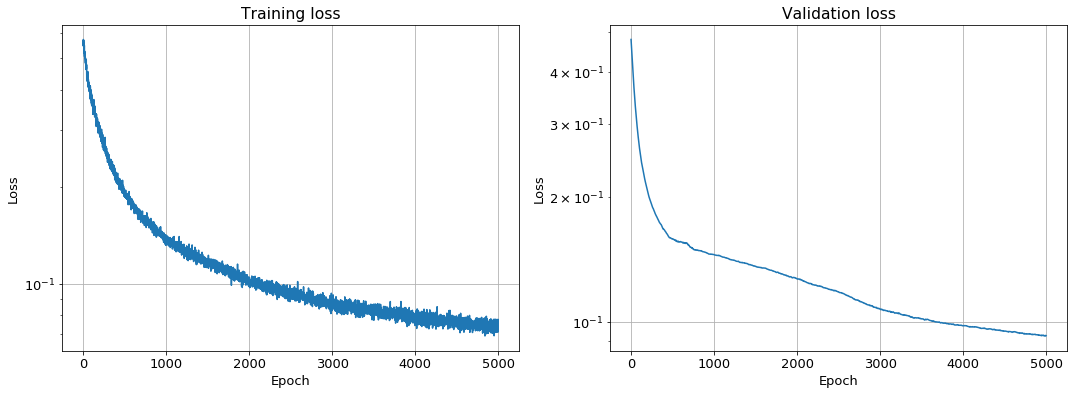

Model name:       TCN-4-transf
Training time:    333.158 sec
Train error:      5.207
Val error:        7.414
Test error (avg): 8.365
           (oil): 5.728
           (gas): 6.324
           (wat): 13.043

C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[4-7]/TCN-4-tuning.hdf saved


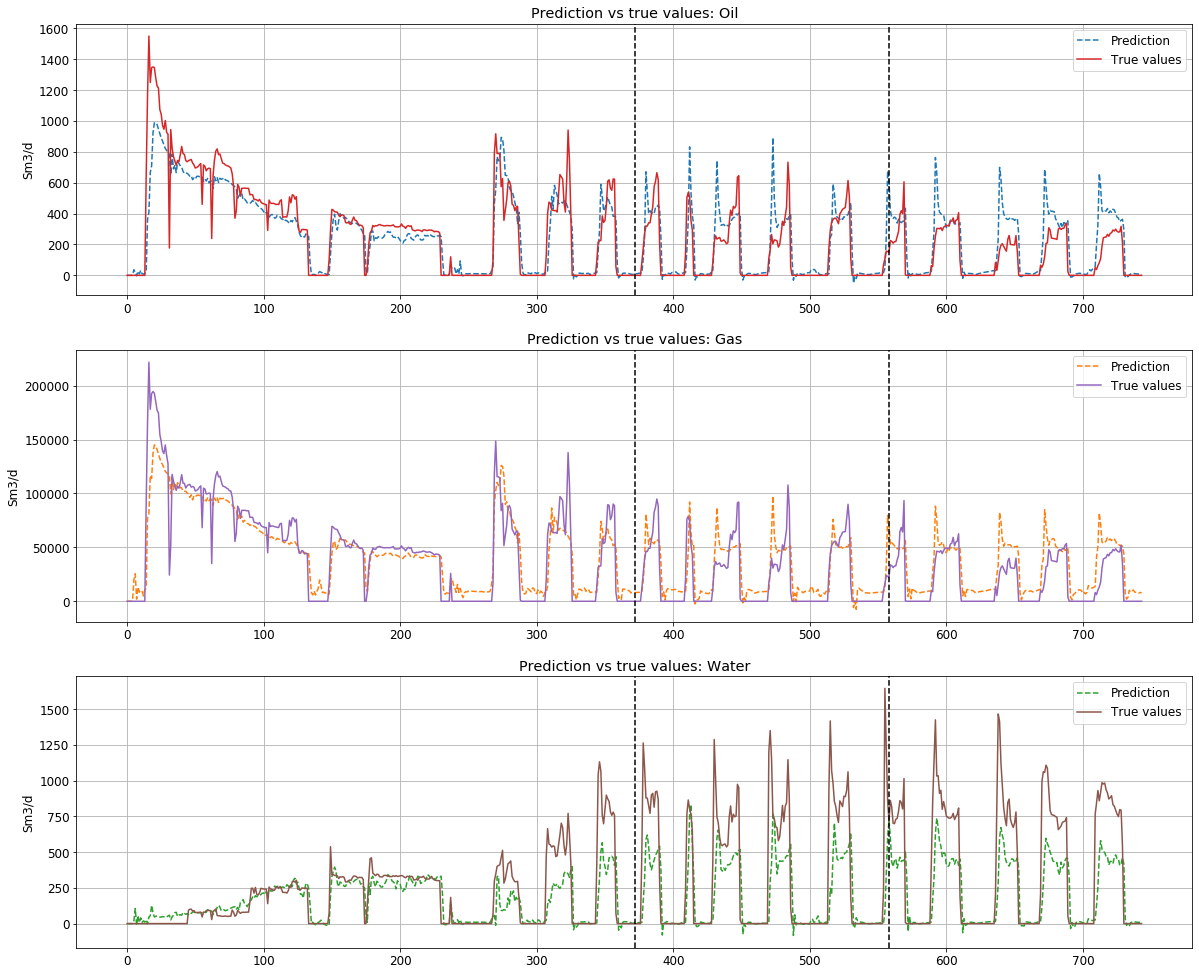

In [16]:
m = TL(model_name='TCN-4', 
       study_path=STUDY_PATH, 
       real_file=REAL_FILE_ALL, 
       train_all_ratio=1/2, 
       loss='mae', 
       lr=1e-5)

m.train(n_epochs=5000, tuning=True, verbose=False)
err, t = m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
m.save()

#### Transfer -> Tuning

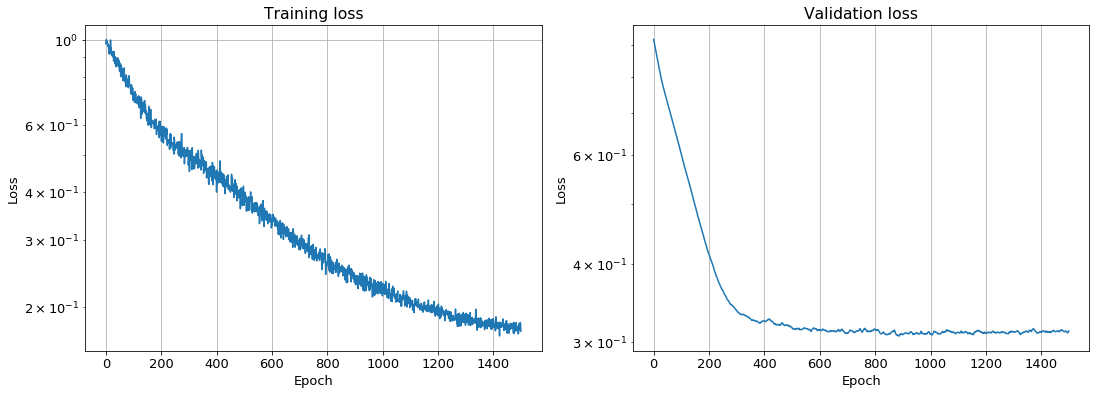

Model name:       TCN-4-transf
Training time:    57.823 sec
Train error:      10.987
Val error:        18.237
Test error (avg): 20.230
           (oil): 17.921
           (gas): 19.746
           (wat): 23.023

C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[4-7]/TCN-4-transf.hdf saved


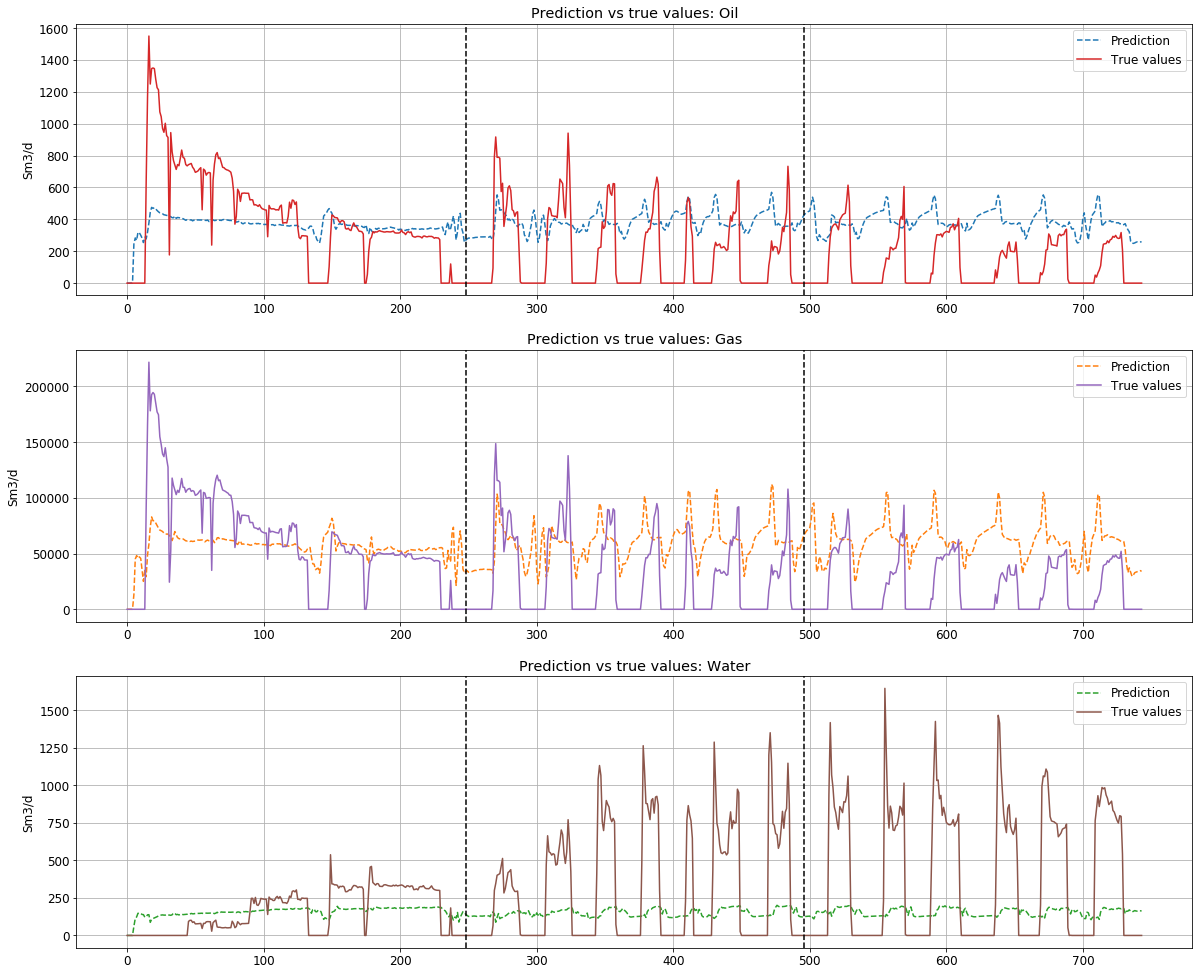

In [18]:
m = TL(model_name='TCN-4', 
       study_path=STUDY_PATH, 
       real_file=REAL_FILE_ALL, 
       train_all_ratio=TRAIN_VAL_RATIO_REAL, 
       loss='mae', 
       lr=1e-4)

m.train(n_epochs=1500, tuning=False, verbose=False)
err, t = m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
m.save()

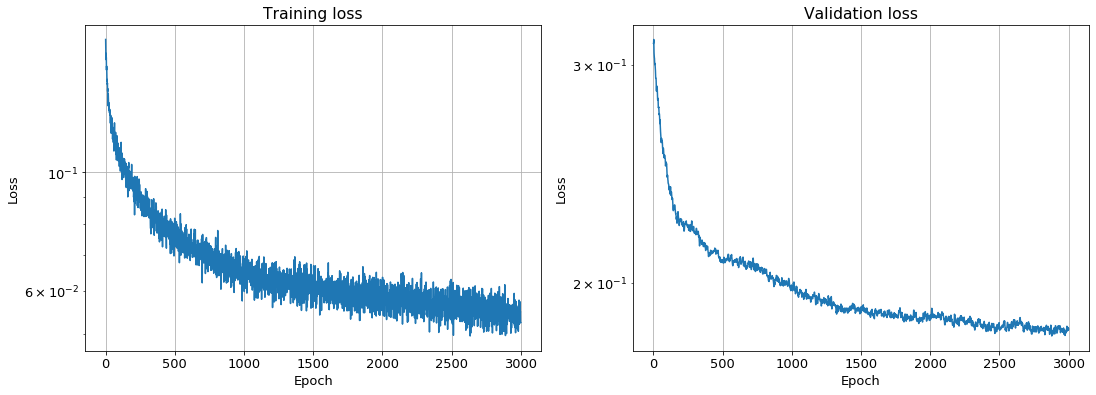

Model name:       TCN-4-transf
Training time:    173.717 sec
Train error:      3.425
Val error:        9.190
Test error (avg): 9.275
           (oil): 5.818
           (gas): 6.177
           (wat): 15.829

C:/Users/Asus/Desktop/Skoltech/Multiphase flows/data/Subsea_Study[4-7]/TCN-4-tuning.hdf saved


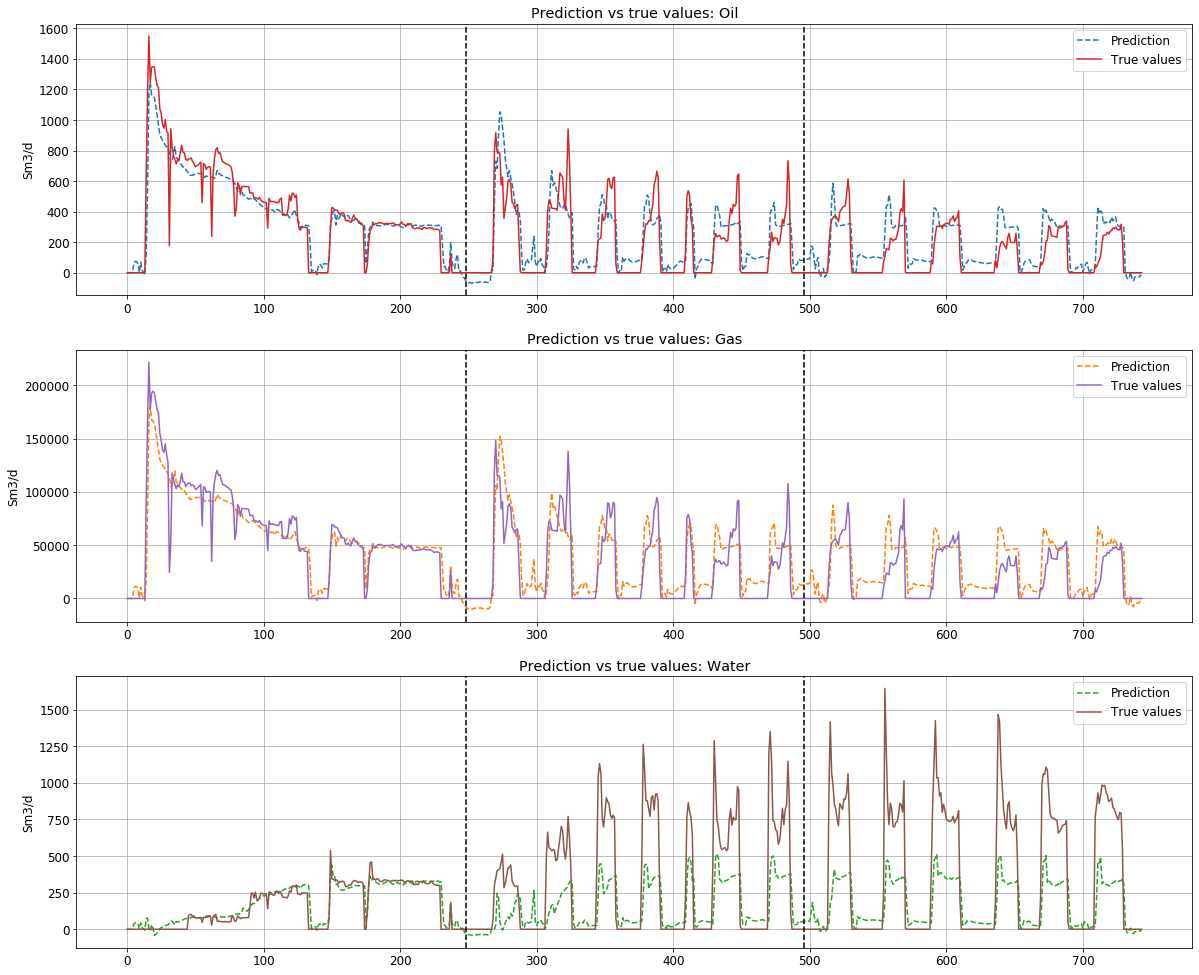

In [19]:
m.train(n_epochs=3000, tuning=True, verbose=False)
err, t = m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
m.save()

### LSTM

#### Transfer

In [20]:
m = TL(model_name='LSTM-4', 
       study_path=STUDY_PATH, 
       real_file=REAL_FILE_ALL, 
       train_all_ratio=1/2, 
       loss='mae', 
       lr=1e-4)

m.train(n_epochs=5000, tuning=False, verbose=False)
err, t = m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
m.save()

KeyboardInterrupt: 

#### Tuning

In [ ]:
m = TL(model_name='LSTM-4', 
       study_path=STUDY_PATH, 
       real_file=REAL_FILE_ALL, 
       train_all_ratio=1/2, 
       loss='mae', 
       lr=1e-4)

m.train(n_epochs=5000, tuning=True, verbose=False)
err, t = m.predict(plot_losses=True, plot_preds=True, plot_errs=False, print_res=True)
m.save()